226.34140154512335 [15.06694099  9.3774513 ]


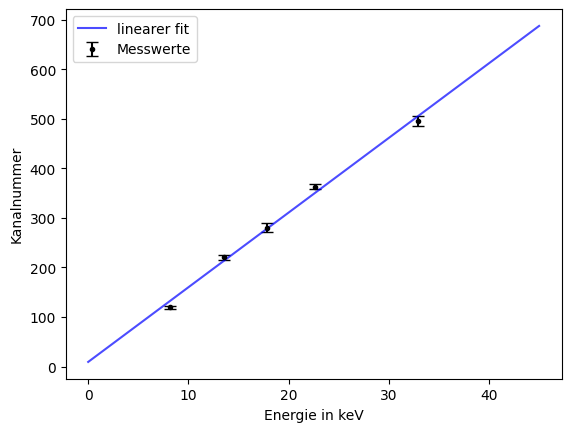

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#erste messung
# Ag 22.6 keV
Ag_max = 363
Ag_err = 5

# Cu 8.15 keV
Cu_max = 120
Cu_err = 3

# Rb 13.6 keV
Rb_max_1 = 300
Rb_err_1 = 10
Rb_max_2 = 221
Rb_err_2 = 5

# Mo 17.8 keV
Mo_max = 280
Mo_err = 9

# Ba 32.9 keV
Ba_weirdpeak1 = 40
Ba_weirdpeak1_err = 2
Ba_weirdpeak2 = 105
Ba_weirdpeak2_err = 5
Ba_max = 495
Ba_err = 10

# Tb 45.5 keV
# Tb_max = NaN
# Tb_err 

values_y = [Cu_max, Rb_max_2, Mo_max, Ag_max, Ba_max]
values_y_inclusive = [Ag_max, Cu_max,Rb_max_1, Rb_max_2, Mo_max, Ba_weirdpeak1, Ba_weirdpeak2, Ba_max]
values_y_err = [Cu_err, Rb_err_2, Mo_err, Ag_err, Ba_err]
values_y_inclusive_err = [Ag_err, Cu_err, Rb_err_1, Rb_err_2, Mo_err, Ba_weirdpeak1_err, Ba_weirdpeak2_err, Ba_err]
values_x = [8.15, 13.6, 17.8, 22.6, 32.9]
values_x_inclusive = [8.15, 13.6, 17.8, 17.8, 22.6, 32.9, 32.9, 32.9]

def linear(x, m, b):
    return m * x + b

popt, pcov = curve_fit(linear, values_x, values_y, p0 = [1,1])
 

x_dummy = np.linspace(0, 45, 100)

fig, ax = plt.subplots()
ax.errorbar(values_x, values_y, yerr=values_y_err, fmt='.k', label='Messwerte', capsize = 4)
#ax.errorbar(values_x_inclusive, values_y_inclusive, yerr=values_y_inclusive_err, fmt='.k', label='Messwerte inklusiv', capsize = 4, alpha=0.3)
ax.plot(x_dummy, linear(x_dummy, *popt), 'b-', label='linearer fit', alpha=0.7)
print(linear(14.4, *popt), popt)
ax.set_xlabel('Energie in keV')
ax.set_ylabel('Kanalnummer')

ax.legend()


# Fehler geschwindigkeiten: 0.055 mm/s bzw 1% der geschwindigkeit

In [14]:
alpha_Eisenoxid_Fe2_O3_peaks_mmps = np.array([-8.528, -5.259, -1.703, 0.9072, 4.5043, 8.2303])
alpha_Eisenoxid_Fe2_O3_peaks_mmps_err = [0.0084, 0.0136, 0.00538, 0.05185, 0.0119, 0.00826]


E_0=14.41*1.602*10**(-16)
c=299792458
mu_g=0.09044*5.05*10**(-27)
e=1.602*10**(-19)
Q = 0.21*10**(-28)
Ergebnis=np.array(E_0/c*alpha_Eisenoxid_Fe2_O3_peaks_mmps*10**(-3))


from sympy import symbols, Eq, solve
mu_a, B, IS, Vzz = symbols('mu_a B IS Vzz')

eq1 = Eq((-mu_a*1+mu_g)*B + e*Q*Vzz/4 + IS,Ergebnis[0])
eq2 = Eq((-mu_a/3+mu_g)*B - e*Q*Vzz/4 + IS,Ergebnis[1])
eq3 = Eq((mu_a/3+mu_g)*B - e*Q*Vzz/4 + IS,Ergebnis[2])
eq4 = Eq((-mu_a/3-mu_g)*B - e*Q*Vzz/4 + IS,Ergebnis[3])
# # eq5 = Eq((-mu_a*(-1/2)/(3/2)  +   mu_g*(-1/2)/(1/2))*B + e*Q*Vzz/4 + IS,Ergebnis[4])
eq6 = Eq((mu_a-mu_g)*B + e*Q*Vzz/4 + IS,Ergebnis[5])

lsg = solve((eq1, eq2, eq3, eq6), (mu_a, B, IS, Vzz))
print(lsg)

[(-8.00011542288557e-28, -51.3407901255602, -2.25117308554840e-27, 1.31382002056013e+21)]


In [15]:
E_0=14.41*10**3
dicke_in_mg_Fe57_pro_mm2 = [0.05, 0.1, 0.25, 0.35, 1, 2]
linienbreiten_raw = [0.1704, 0.217, 0.3516, 0.3763, 0.4621, 0.5537]
linienbreiten_err_raw = [0.02613, 0.02152, 0.02188, 0.01976, 0.01754, 0.0234]
# linienbreiten = E_0*np.array(linienbreiten_raw)*10**(-3)/c
# linienbreiten_err = E_0*np.array(linienbreiten_err_raw)*10**(-3)/c
# linienbreiten_err= np.sqrt(np.array(linienbreiten_err)**2 + 0.02**2*np.array(linienbreiten)**2)
# planck_h = 4.135667696*10**-15 # eV s
# linienbreiten= linienbreiten/planck_h
# linienbreiten_err= linienbreiten_err/planck_h

# # Konversion der Linienbreiten von Hz in MHz
# linienbreiten = linienbreiten*10**(-6)
# linienbreiten_err = linienbreiten_err*10**(-6)

# vielleicht mal so probieren

linienbreiten = np.array(linienbreiten_raw) * 11.6248
linienbreiten_err = np.sqrt(np.array(linienbreiten_err_raw)**2 + 0.02**2*np.array(linienbreiten_raw)**2) * 11.6248
print(linienbreiten)
# # es kommt genau das gleiche raus
# # GG man ich kann nicht mehr

[1.98086592 2.5225816  4.08727968 4.37441224 5.37182008 6.43665176]


natuerliche Linienbreite in MHz: 0.8572337262546996
[1.98086592 2.5225816  4.08727968 4.37441224 5.37182008 6.43665176] [0.30632867 0.25520236 0.26716396 0.24580289 0.23047208 0.30094393]


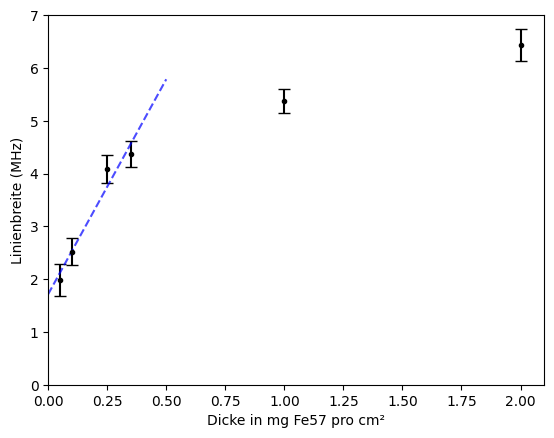

In [16]:
cut = -2
beta = 0.021
def linear(x, Gamma_0_lin, f_a):
    return 2*Gamma_0_lin*(1+0.134*f_a*0.606*x/beta)

fig, ax = plt.subplots()
ax.errorbar(dicke_in_mg_Fe57_pro_mm2, linienbreiten, yerr=linienbreiten_err, fmt='.k', capsize = 4)
ax.set_xlabel('Dicke in mg Fe57 pro cm²')
ax.set_ylabel('Linienbreite (MHz)')
popt, pcov = curve_fit(linear, dicke_in_mg_Fe57_pro_mm2[:cut], linienbreiten[:cut], sigma=linienbreiten_err[:cut], absolute_sigma=True, p0 = [1,1])
dummy_dicke = np.linspace(0, 0.5, 100)
ax.plot(dummy_dicke, linear(dummy_dicke, *popt), 'b--', label='linearer fit', alpha=0.7)
ax.set_xlim(0, 2.1)
ax.set_ylim(0, 7)

print(f'natuerliche Linienbreite in MHz: {linear(0, *popt)/2}')
print(linienbreiten, linienbreiten_err)

natuerliche Linienbreite in MHz: 0.8572337262546996 +- 0.1304495087294472


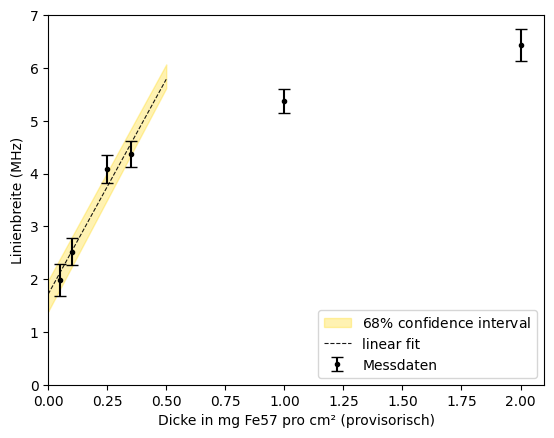

In [17]:
# Upper limit estimate
# Still bad

fig, ax = plt.subplots()
ax.errorbar(dicke_in_mg_Fe57_pro_mm2, linienbreiten, yerr=linienbreiten_err, fmt='.k', capsize = 4 , label='Messdaten')
ax.set_xlabel('Dicke in mg Fe57 pro cm² (provisorisch)')
ax.set_ylabel('Linienbreite (MHz)')
popt, pcov = curve_fit(linear, dicke_in_mg_Fe57_pro_mm2[:cut], linienbreiten[:cut], sigma=linienbreiten_err[:cut], absolute_sigma=True, p0 = [1,1])
popt_upper, pcov_upper = curve_fit(linear, dicke_in_mg_Fe57_pro_mm2[:cut], linienbreiten[:cut]+linienbreiten_err[:cut], p0 = [1,1])
popt_lower, pcov_lower = curve_fit(linear, dicke_in_mg_Fe57_pro_mm2[:cut], linienbreiten[:cut]-linienbreiten_err[:cut], p0 = [1,1])
dummy_dicke = np.linspace(0, 0.5, 100)
ax.fill_between(dummy_dicke, linear(dummy_dicke, *popt_upper), linear(dummy_dicke, *popt_lower), color='gold', alpha = 0.3, label=f'$68$% confidence interval')
ax.plot(dummy_dicke, linear(dummy_dicke, *popt), 'k--', linewidth=0.8, label='linear fit', alpha=0.9)
ax.set_xlim(0, 2.1)
ax.set_ylim(0, 7)
print(f'natuerliche Linienbreite in MHz: {popt[0]} +- {pcov[0,0]**0.5}')
ax.legend( loc = 'lower right')

natuerliche Linienbreite in MHz: 1.1744300056105892 +- 0.10898227972913754


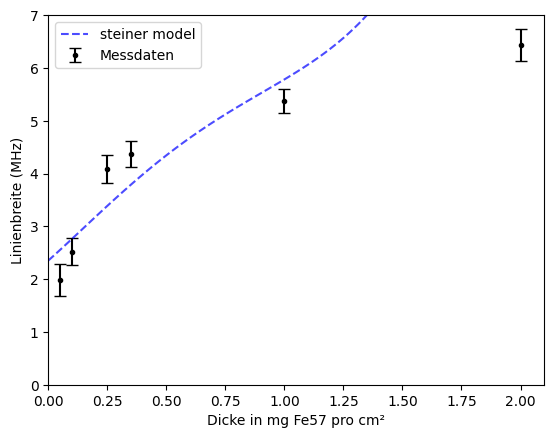

In [18]:
# Estimate with better fit function
beta = 0.021 # Rel. Haeufigkeit von Eisen-57 im Absorber
def model_steiner(x, Gamma_0, param_1):
    return 2* Gamma_0 *(1+ 0.1306*param_1*0.606/beta*x+ 0.00365*(x*0.606/beta*param_1)**2 - 0.00074*(x*0.606/beta*param_1)**3 + 0.000027*(x*0.606/beta*param_1)**4)


fig, ax = plt.subplots()
ax.errorbar(dicke_in_mg_Fe57_pro_mm2, linienbreiten, yerr=linienbreiten_err, fmt='.k', capsize = 4, label='Messdaten')
ax.set_xlabel('Dicke in mg Fe57 pro cm²')
ax.set_ylabel('Linienbreite (MHz)')
popt_steiner, pcov_steiner = curve_fit(model_steiner, dicke_in_mg_Fe57_pro_mm2[:5], linienbreiten[:5], sigma=linienbreiten_err[:5], absolute_sigma=True, p0=[1.13, 0.7])
dummy_dicke = np.linspace(0, 2, 100)
ax.plot(dummy_dicke, model_steiner(dummy_dicke, *popt_steiner), 'b--', label='steiner model', alpha=0.7)
ax.set_xlim(0, 2.1)
ax.set_ylim(0, 7)
ax.legend()

print(f'natuerliche Linienbreite in MHz: {popt_steiner[0]} +- {pcov_steiner[0,0]**0.5}')

In [19]:
# dominante fehlequellen aufschreiben: Geschwindigkeitsfehler, fehler aus fits

Die steigung gibt dann den Debeye-Waller Faktor mit durch: \
$T = param_1 \cdot d' = f_a \frac{0.606 d'}{\beta}$ \
\
bedeutet umgestellt dann: \
$f_a = param_1 \cdot \frac{\beta}{0.606}$


In [20]:

f_a = popt_steiner[1]
f_a_err = pcov_steiner[1,1]**0.5
print(f'mit dem Steiner-Modell ergibt sich der Debeye-Waller Faktor zu: f_a_steiner = {f_a} +- {f_a_err}')

# Jetzt fuer den linearen fit:
f_a_lin = popt[1]
f_a_lin_err = pcov[1,1]**0.5
print(f'mit dem Linearen Modell ergibt sich der Debeye-Waller Faktor zu: f_a_lin = {f_a_lin} +- {f_a_lin_err}')

mit dem Steiner-Modell ergibt sich der Debeye-Waller Faktor zu: f_a_steiner = 0.4510256963076044 +- 0.10742362794979146
mit dem Linearen Modell ergibt sich der Debeye-Waller Faktor zu: f_a_lin = 1.2280259804124687 +- 0.34284968499192997


In [21]:
def find_chi2_red(x,y,model, errors, popt):
    chi2 = np.sum(((y - model(x, *popt)) / errors)**2)
    dof = len(y) - len(popt)  # degrees of freedom
    chi2_red = chi2 / dof
    print(f"chi2_red {model} =", chi2_red)

x=np.array(dicke_in_mg_Fe57_pro_mm2[:cut])
y=np.array(linienbreiten[:cut])
eerrr = np.array(linienbreiten_err[:cut])

find_chi2_red(x,y, model_steiner, eerrr, popt_steiner)
find_chi2_red(x,y,linear, eerrr, popt)


chi2_red <function model_steiner at 0x0000014E2AB67100> = 8.473642225736233
chi2_red <function linear at 0x0000014E618B7A60> = 1.2007834259551964


Okay ich geb auf. Amplituden Fit:

chi2_red <function amp_fit at 0x0000014E618A4860> = 0.7971908769763437
[0.69271828 0.19656007] [[ 0.00345817 -0.00196168]
 [-0.00196168  0.00183569]]


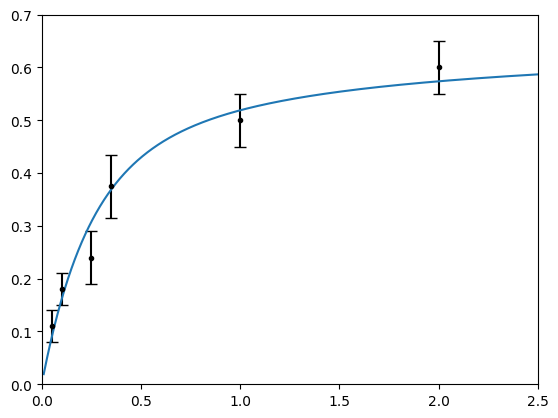

In [22]:
from scipy.special import i0

# Debeye-Waller Faktor des Absorbers f_A erstmal hardcoden auf 0.8 weil messwerte kaputt
f_A_hardcoded = 0.18


# Amplituden ablesen
min = np.array([0.89, 0.82, 0.76, 0.625, 0.5, 0.4])
backgr = np.ones_like(min)
amp = backgr - min
amp_err = np.array([0.03,0.03,0.05,0.06,0.05,0.05])
d_prime = np.array(dicke_in_mg_Fe57_pro_mm2)

def amp_fit(d, f_s, f_a):
    T = np.array(d) * f_a * 0.606/beta
    return f_s*(1-np.exp(-T/2)*i0(T/2))

dummy_thick = np.linspace(0.01,2.5,1000)

popt_amp, pcov_amp = curve_fit(amp_fit, d_prime, amp, sigma=amp_err, absolute_sigma=True, p0=[1,1])
fig, ax = plt.subplots()
ax.errorbar(d_prime, amp, yerr=amp_err, fmt='.k', capsize=4)
ax.plot(dummy_thick, amp_fit(dummy_thick, *popt_amp))
ax.set_xlim(0,np.max(d_prime)+0.5)
ax.set_ylim(0,0.7)

find_chi2_red(d_prime, amp, amp_fit, amp_err, popt_amp)
print(popt_amp, pcov_amp)

In [ ]:
# import os
# from io import StringIO
# path_thickness_variation = './SvenLuner/Dickescan Kaliumhexacyanoferrat/ws5things/'
# file_names = os.listdir(path_thickness_variation)
# ampl = np.zeros(len(file_names))
# ampl_error = np.zeros(len(file_names))

# def load_w5(path):
#     inside = False
#     lines = []
#     with open(path, "r", encoding="utf-8") as f:
#         for line in f:
#             if "<data" in line:
#                 inside = True
#                 after = line.split(">", 1)[-1]  # grab stuff after <data ...>
#                 if after.strip():
#                     lines.append(after.split("</data>")[0])
#             elif "</data>" in line:
#                 before = line.split("</data>", 1)[0]
#                 if before.strip():
#                     lines.append(before)
#                 break
#             elif inside:
#                 lines.append(line)

#     # now load with numpy
#     buf = StringIO("".join(lines))                                                                                
#     return np.loadtxt(buf, dtype=int)

# for file in file_names:
#     counts = load_w5(path_thickness_variation + file)
#     zInf = np.average(counts[:counts.size//4])
#     z0 = np.average(np.sort(counts)[:3])
#     zInf_error = np.std(counts[:counts.size//4])
#     z0_error = np.std(np.sort(counts)[:3])
#     ampl[i] = (zInf - z0) / zInf
#     ampl_error[i] = np.sqrt((z0_error / zInf) ** 2 + (z0 * zInf_error / (zInf ** 2)) ** 2)